# Insurance Fraud Predictive Model

## Case Study

An insurance company plans to utilise their historic insurance fraud dataset to predict the likelihood or the level of risk a customer poses. Referring genuine claims cause customer stress and directly leads to customer loss, costing the company money (assume that any referred non-fraud case will lead to losing that customer). While obviously, fraud claims cost the company as well. Their main requirement is to use an unbiased predictive model capable of flagging and referring potential fraud cases for further investigation with a balanced error rate of 5% 

## 1. Aims and objectives

### a) Aims and objectives

Aim:

The aim of this case study analysis is to develop an unbiased predictive model capable of identifying potential fraud cases in insurance claims with a balanced error rate of 5%. This would assist in minimizing the cost of false positives (referring genuine claims, leading to customer loss) and false negatives (not identifying fraudulent claims).

Objectives:

Data Understanding and Preparation: Analyze the given dataset and extract key insights from the historic insurance fraud dataset. Preprocess and clean the data, ensuring it is suitable for further analysis. Merge all necessary files to form a unified dataset.

Model Development: Build a predictive model utilizing Machine Learning techniques to forecast the likelihood of fraudulent cases. Here, both accuracy (model's performance) and fairness (unbiased decision-making) should be considered.

Evaluation: Use appropriate metrics for model evaluation. The goal is to maintain an error rate of 5% or less, as specified by the client.


## 2. Understanding the case study 

###  Case study analysis

1. The insurance company wants to predict the likelihood of a customer posing a risk of insurance fraud. The aim is to use an unbiased predictive model to flag potential fraud cases for further investigation
2. The company desires a balanced error rate of 5%. This means that the model should aim to have an equal number of false positives and false negatives, with the total error not exceeding 5%.
3. There are significant costs associated with both types of errors. False positives (referring genuine claims as fraudulent) can lead to customer loss, while false negatives (failing to identify actual fraudulent claims) result in financial loss to the company.
4. Ensure the model is unbiased by carefully selecting features for prediction and ensuring they do not indirectly encode any form of bias



## 3. Pre-processing applied 


In [1]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score ,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [2]:
df_demographics = pd.read_csv("Train_Demographics.csv")
df_policy = pd.read_csv('Train_Policy.csv')
df_claim = pd.read_csv('Train_Claim.csv')
df_vehicle = pd.read_csv('Train_Vehicle.csv')
df_target = pd.read_csv('Traindata_with_Target.csv')

# Merge all dataframes on 'CustomerID'
df = pd.merge(df_demographics, df_policy, on='CustomerID')
df = pd.merge(df, df_claim, on='CustomerID')
df = pd.merge(df, df_vehicle, on='CustomerID')
df = pd.merge(df, df_target, on='CustomerID')

# Display the first few rows of the merged dataframe
df

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleAttribute,VehicleAttributeDetails,ReportedFraud
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,...,1,0,?,65501,13417,6071,46013,VehicleID,Vehicle26917,N
1,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,...,1,0,?,65501,13417,6071,46013,VehicleModel,A5,N
2,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,...,1,0,?,65501,13417,6071,46013,VehicleYOM,2008,N
3,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,...,1,0,?,65501,13417,6071,46013,VehicleMake,Audi,N
4,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,...,2,1,YES,61382,15560,5919,39903,VehicleYOM,2006,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115339,Cust9997,53,472634,MALE,Associate,transport-moving,skydiving,67400,-43800,India,...,2,0,YES,55830,7059,7059,41712,VehicleYOM,2004,N
115340,Cust9999,36,450730,FEMALE,PhD,handlers-cleaners,base-jumping,46400,-74300,India,...,1,3,YES,68969,12075,6038,50856,VehicleModel,E400,N
115341,Cust9999,36,450730,FEMALE,PhD,handlers-cleaners,base-jumping,46400,-74300,India,...,1,3,YES,68969,12075,6038,50856,VehicleID,Vehicle39163,N
115342,Cust9999,36,450730,FEMALE,PhD,handlers-cleaners,base-jumping,46400,-74300,India,...,1,3,YES,68969,12075,6038,50856,VehicleMake,Suburu,N


In [3]:
df.dtypes

CustomerID                     object
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss                     int64
Country                        object
InsurancePolicyNumber           int64
CustomerLoyaltyPeriod           int64
DateOfPolicyCoverage           object
InsurancePolicyState           object
Policy_CombinedSingleLimit     object
Policy_Deductible               int64
PolicyAnnualPremium           float64
UmbrellaLimit                   int64
InsuredRelationship            object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddr

###  a) Preparing the labels appropriately if necessary 

In [4]:
# Binary Encoding
# LabelEncoder to convert 'Fraud' to 1 and 'Not Fraud' to 0
le = LabelEncoder()
df['ReportedFraud'] = le.fit_transform(df['ReportedFraud'])

###  b) Removing synonymous and noisy attributes if necessary 


In [5]:
unnecessary_attribute = ['CustomerID', 'Country', 'DateOfPolicyCoverage', 'DateOfIncident', 
                         'IncidentAddress', 'VehicleAttribute', 'VehicleAttributeDetails','InsuredZipCode',
                         'InsurancePolicyNumber','InsuredHobbies','IncidentTime','AmountOfInjuryClaim','AmountOfPropertyClaim',
                         'AmountOfVehicleDamage','Policy_CombinedSingleLimit'  ]
df = df.drop(unnecessary_attribute, axis=1)

###  c) Dealing with missing values if necessary 


In [6]:
missing_values = ['?', 'NA', 'MISSINGVAL','???','MISSEDDATA','MISSINGVALUE']
for missing_value_symbol in missing_values:
    df = df.replace(missing_value_symbol, np.NaN)

df.head()
df.isnull().sum()
missing_data = df.isnull().sum() / len(df) * 100
# print(missing_data)

# #For 'TypeOfCollission', 'PropertyDamage', and 'PoliceReport' which have 17.9%, 36.27%, and 34% missing data respectively.
# we fill the missing values with 'Unknown' as  a separate category 
df['TypeOfCollission'].fillna('Unknown', inplace=True)
df['PropertyDamage'].fillna('Unknown', inplace=True)
df['PoliceReport'].fillna('Unknown', inplace=True)

# For 'InsuredGender', 'Country', and 'VehicleAttributeDetails','AmountOfTotalClaim' and 'Witnesses' we drop the rows with missing values. 
# Since the percentage of missing values in these columns is less than 1%
df = df.dropna(subset=['InsuredGender','Witnesses','AmountOfTotalClaim'])
df.isnull().sum()

#For 'PolicyAnnualPremium' the percentage of missing values is 0.49% so we drop the rows with missing values
anual_prem = df[df['PolicyAnnualPremium'] == -1].shape[0]/df.shape[0] * 100
#Drop all the value == -1 in PolicyAnnualPremium
df = df[df['PolicyAnnualPremium'] != -1]

###  d) Relabeling for some attributes 


In [7]:
# Create a dictionary to map the education levels to their relabeled values
relabeled_education_levels = {
    "PhD": 7,
    "MD": 6,
    "JD": 5,
    "Masters": 4,
    "College": 3,
    "Associate": 2,
    "High School": 1,
}
df["InsuredEducationLevel"] = df["InsuredEducationLevel"].replace(relabeled_education_levels)


# Encode the categorical features
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))  

# convert AmountOfTotalClaim and Witnesses to int64
df['AmountOfTotalClaim'] = df['AmountOfTotalClaim'].astype(int)
df['Witnesses'] = df['Witnesses'].astype(int)

# convert 'CapitalLoss' positive 
df['CapitalLoss'] = df['CapitalLoss'].abs()
#convert all the negative of 'UmbrellaLimit' become 0
df['UmbrellaLimit'] = df['UmbrellaLimit'].clip(lower=0)

### e) Other

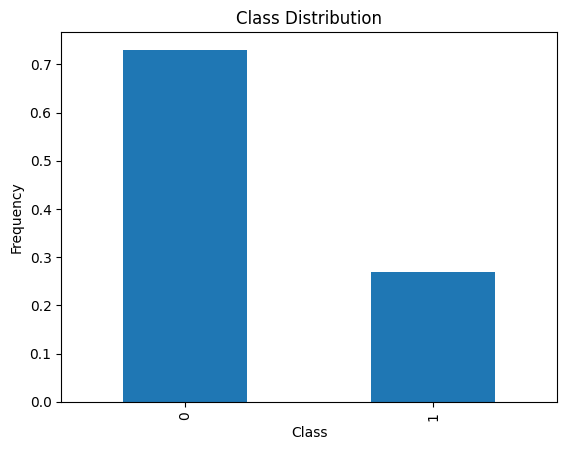

In [75]:
# Checking the balance of classes
class_balance = df['ReportedFraud'].value_counts(normalize=True)
class_balance.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [76]:
class_balance

0    0.730092
1    0.269908
Name: ReportedFraud, dtype: float64

In [8]:
#checking for multicollinearity
def variance_inflation_factor(X, idx):
    ones = np.ones(shape=(X.shape[0], 1))
    X = np.append(ones, X, axis=1)
    X_noti = np.delete(X, idx, axis=1)
    X_i = X[:, idx]

    model = LinearRegression()
    model.fit(X_noti, X_i)

    r_squared_i = model.score(X_noti, X_i)
    vif_i = 1/(1 - r_squared_i)

    return vif_i

# Select only the numeric columns (excluding 'ReportedFraud')
numeric_cols = df.select_dtypes(include=[np.number]).drop(columns='ReportedFraud')

# Calculate and print the VIF for each feature
for i in range(numeric_cols.shape[1]):
    vif = variance_inflation_factor(numeric_cols.values, i)
    print(f'VIF for {numeric_cols.columns[i]}: {vif}')
    
# Drop the columns with VIF > 5
df = df.drop(columns=['InsuredAge','InsuredGender','InsurancePolicyState'])

C:\Users\Justin\AppData\Local\Temp\ipykernel_39448\1837022777.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  vif_i = 1/(1 - r_squared_i)


VIF for InsuredAge: inf
VIF for InsuredGender: 7.830844534471831
VIF for InsuredEducationLevel: 1.0132492054920663
VIF for InsuredOccupation: 1.0085978257307229
VIF for CapitalGains: 1.0081223631072158
VIF for CapitalLoss: 1.02075763442917
VIF for CustomerLoyaltyPeriod: 1.0166828451678898
VIF for InsurancePolicyState: 7.817810483857946
VIF for Policy_Deductible: 1.014660714701352
VIF for PolicyAnnualPremium: 1.021602934174865
VIF for UmbrellaLimit: 1.020124979172929
VIF for InsuredRelationship: 1.0268096326370966
VIF for TypeOfIncident: 1.0182960460218458
VIF for TypeOfCollission: 3.006492449847908
VIF for SeverityOfIncident: 1.2163720058713485
VIF for AuthoritiesContacted: 1.1193856943789908
VIF for IncidentState: 1.069104502853025
VIF for IncidentCity: 1.0292679107069114
VIF for NumberOfVehicles: 1.016231146126819
VIF for PropertyDamage: 3.049227892461801
VIF for BodilyInjuries: 1.0194328143085374
VIF for Witnesses: 1.01570859470901
VIF for PoliceReport: 1.0226759909439922
VIF for Am

 ### f) Appropriate feature selection

In [9]:
# Separate the features and the target
X = df.drop(columns='ReportedFraud')
y = df['ReportedFraud']

# Calculate the mutual information between each feature and the target
mi = mutual_info_classif(X, y)

# Create a Series from the mutual information, with the feature names as the index
mi_series = pd.Series(mi, index=X.columns)

# Sort the Series in descending order
mi_series.sort_values(ascending=False, inplace=True)

# Print the mutual information
mi_series

PolicyAnnualPremium      0.485806
AmountOfTotalClaim       0.453651
UmbrellaLimit            0.158144
CapitalLoss              0.132554
CapitalGains             0.123942
SeverityOfIncident       0.099849
Policy_Deductible        0.023487
TypeOfIncident           0.018659
TypeOfCollission         0.018001
AuthoritiesContacted     0.016150
IncidentState            0.011938
CustomerLoyaltyPeriod    0.011137
BodilyInjuries           0.009475
InsuredOccupation        0.009352
PropertyDamage           0.007994
NumberOfVehicles         0.006212
InsuredEducationLevel    0.005911
Witnesses                0.005834
InsuredRelationship      0.005656
PoliceReport             0.005264
IncidentCity             0.004089
dtype: float64

In [10]:
# Checking the correlation of each feature with the target variable
correlations = df.corr()['ReportedFraud'].sort_values(ascending=False)

correlations

ReportedFraud            1.000000
AmountOfTotalClaim       0.063181
Witnesses                0.047626
UmbrellaLimit            0.047172
NumberOfVehicles         0.042348
PropertyDamage           0.039580
BodilyInjuries           0.025621
InsuredRelationship      0.022686
InsuredEducationLevel    0.018860
CustomerLoyaltyPeriod    0.015185
CapitalLoss              0.014857
Policy_Deductible        0.007387
InsuredOccupation        0.006717
CapitalGains            -0.001585
PoliceReport            -0.005246
PolicyAnnualPremium     -0.019947
AuthoritiesContacted    -0.036112
IncidentCity            -0.036122
TypeOfIncident          -0.039064
IncidentState           -0.063111
TypeOfCollission        -0.113275
SeverityOfIncident      -0.349087
Name: ReportedFraud, dtype: float64

In [21]:
# Select the top 10 features based on mutual information
selected_features_mi = mi_series.head(10).index.tolist()
# Calculate the correlations of features with the target variable
correlations = df.corr()['ReportedFraud'].drop('ReportedFraud')
# Combine these with the features from the correlation method
correlation_threshold = 0.05
selected_features_corr = correlations[correlations.abs() > correlation_threshold].index.tolist()

# Combining the features and removing duplicates
final_selected_features = list(set(selected_features_mi + selected_features_corr))

final_selected_features


['PolicyAnnualPremium',
 'CapitalLoss',
 'AmountOfTotalClaim',
 'UmbrellaLimit',
 'AuthoritiesContacted',
 'IncidentState',
 'TypeOfIncident',
 'Policy_Deductible',
 'CapitalGains',
 'TypeOfCollission',
 'SeverityOfIncident']

In [22]:
# Selecting only the final selected features from the dataset
X_selected = df[final_selected_features]
# Splitting the refined data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((91420, 11), (22856, 11))

## 4. Technique 1: LogisticRegression 

### a) Motivation for choosing the technique and the schematic figure of the process


Motivation for choosing the technique: Logistic Regression is a simple yet powerful linear model that is widely used for binary classification problems. It is easy to implement, interpret, and very efficient to train. It makes no assumptions about distributions of classes in feature space. They can be linearly separable, or not. Logistic regression can also be regularized by penalizing coefficients with a tunable penalty strength.

Setting hyper parameters: The main hyperparameter in Logistic Regression is the regularization strength 'C', which can prevent overfitting. A smaller value specifies stronger regularization.

Optimizing the hyperparameters: GridSearchCV will be used for hyperparameter tuning. It is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search. It does a exhaustive generation of combination of parameters passed and returns the best combination/result.

Performance metrics for training set:  Accuracy, precision, recall, and F1-score will be the performance metrics. That these are common metrics for binary classification problems.


### b) Setting hyper parameters with rationale

In [37]:
# Set up the pipeline 
pipelineLR = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='sag', max_iter=1000, class_weight='balanced'))
])
pipelineLR

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    solver='sag'))])

### c) Optimising hyper parameters


In [60]:
# Set up the parameter grid for GridSearchCV
param_grid_LR = {
      'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
      'classifier__penalty': ['l1', 'l2'],
      'classifier__solver': ['liblinear', 'saga']
}

# Optimize the hyperparameters using GridSearchCV
grid_search_LR = GridSearchCV(estimator=pipelineLR,param_grid= param_grid_LR, cv=5)

In [61]:
grid_search_LR.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           solver='sag'))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga']})

In [40]:
best_params = grid_search_LR.best_params_
best_params

{'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

### d) Performance metrics for training

In [62]:
# Extracting the best hyperparameters from the simplified grid search
best_params_LR = grid_search_LR.best_params_
train_score_LR = grid_search_LR.score(X_train, y_train)
test_score_LR = grid_search_LR.score(X_test, y_test)

best_params_LR, train_score_LR, test_score_LR

({'classifier__C': 0.1,
  'classifier__penalty': 'l1',
  'classifier__solver': 'saga'},
 0.6773681907678845,
 0.6805652782639132)

In [46]:
best_model_LR = grid_search_LR.best_estimator_
test_score_LR = best_model_LR.score(X_test, y_test)
print("Test accuracy: %f" % test_score_LR)

Test accuracy: 0.680565


## 5. Technique 2: Random Forest Classifier 

### a) Motivation for choosing the technique and the schematic figure of the process

Motivation for choosing the technique: Random Forest is a versatile machine learning method capable of performing both regression and classification tasks. It is a type of ensemble learning method, where a group of weak models combine to form a powerful model. In Random Forest, we grow multiple trees as opposed to a single tree. To classify a new object based on attributes, each tree gives a classification. The forest chooses the classification having the most votes(over all the trees in the forest).

Setting hyper parameters: The main hyperparameters in Random Forest are 'n_estimators' (The number of trees in the forest), 'max_features' (The number of features to consider when looking for the best split), and 'max_depth' (The maximum depth of the tree).

Optimizing the hyperparameters: GridSearchCV will be use for hyperparameter tuning.

Performance metrics for training set: Accuracy, precision, recall, and F1-score will be the performance metrics.


### b) Setting hyper parameters with rationale


In [25]:
# Set up the pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced'))
])
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced'))])

### c) Optimising hyper parameters


In [69]:
# Simplifying the parameter grid for GridSearchCV
simplified_param_grid = {
    'classifier__max_depth': [10, 15, 20],  # Reduced depth options
    'classifier__min_samples_split': [10, 20],  # Fewer splitting samples options
    'classifier__min_samples_leaf': [2, 4],  # Fewer leaf samples options
    'classifier__max_features': ['sqrt']  # Reduced feature options
}

# Re-running GridSearchCV with the simplified parameter grid and top features
grid_search = GridSearchCV(estimator=pipeline, param_grid=simplified_param_grid, 
                                      cv=3, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               max_depth=20,
                                                               min_samples_leaf=2,
                                                               min_samples_split=10))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 15, 20],
                         'classifier__max_features': ['sqrt'],
                         'classifier__min_samples_leaf': [2, 4],
                         'classifier__min_samples_split': [10, 20]},
             verbose=1)

### d) Performance metrics for training

In [58]:
# Extracting the best hyperparameters from the simplified grid search
best_params = grid_search.best_params_
train_score = grid_search.score(X_train, y_train)
test_score = grid_search.score(X_test, y_test)

best_params, train_score, test_score

({'classifier__max_depth': 20,
  'classifier__max_features': 'sqrt',
  'classifier__min_samples_leaf': 2,
  'classifier__min_samples_split': 10},
 0.9877707285057974,
 0.9761113055652783)

In [59]:
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test accuracy: %f" % test_score)

Test accuracy: 0.976111


In [ ]:
# # Train the model on the entire training set using the selected hyperparameters
# pipeline.set_params(**best_params)
# pipeline.fit(X_train, y_train)

# # Evaluate the model on the testing set
# test_score = pipeline.score(X_test, y_test)
# print("Test accuracy: %0.2f" % test_score)

In [ ]:
# # Evaluate the model on the training set
# train_score = pipeline.score(X_train, y_train)

# # Display training accuracy, test accuracy, and best parameters
# train_score, test_score, best_params


## 6. Comparison of metrics performance for testing 

### a) Use of cross validation for both techniques to deal with over-fitting

In [70]:
# Define the inner and outer cross-validation
inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)


# Optimize the hyperparameters using GridSearchCV 
grid_search_LR_CV = GridSearchCV(estimator=pipelineLR,param_grid= param_grid_LR, cv=inner_cv)
scores_LR = cross_val_score(grid_search_LR_CV, X_train, y_train, cv=outer_cv)

# Optimize the hyperparameters using GridSearchCV
grid_search_CV = GridSearchCV(estimator=pipeline,param_grid= simplified_param_grid, cv=inner_cv)
scores = cross_val_score(grid_search_CV, X_train, y_train, cv=outer_cv)


# Print the mean score and standard deviation
print(" LogisticRegression : Accuracy: %0.2f (+/- %0.2f)" % (scores_LR.mean(), scores_LR.std() * 2))
print(" RandomForestClassifier : Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


 LogisticRegression : Accuracy: 0.68 (+/- 0.01)
 RandomForestClassifier : Accuracy: 0.96 (+/- 0.00)


### b) Comparison with appropriate metrics for testing

In [63]:
# Evaluate the model on the testing set
test_score_LR = grid_search_LR.score(X_test, y_test)
test_score = grid_search.score(X_test, y_test)
print("LogisticRegression : Test accuracy: %f" % test_score_LR)
print("RandomForestClassifier : Test accuracy: %f" % test_score)

LogisticRegression : Test accuracy: 0.680565
RandomForestClassifier : Test accuracy: 0.976111


### c) Model selection (ROC or other charts)

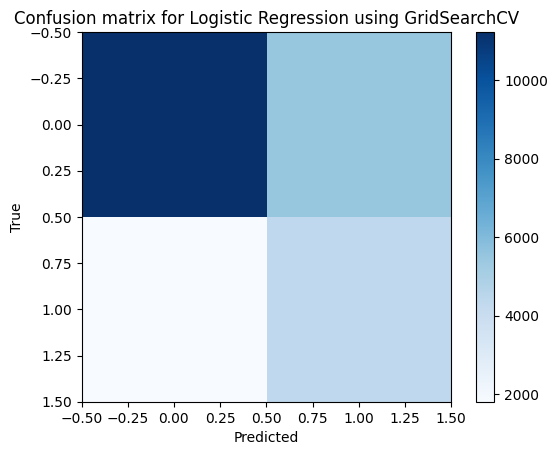

Text(0.5, 1.0, 'Confusion matrix for Random Forest')

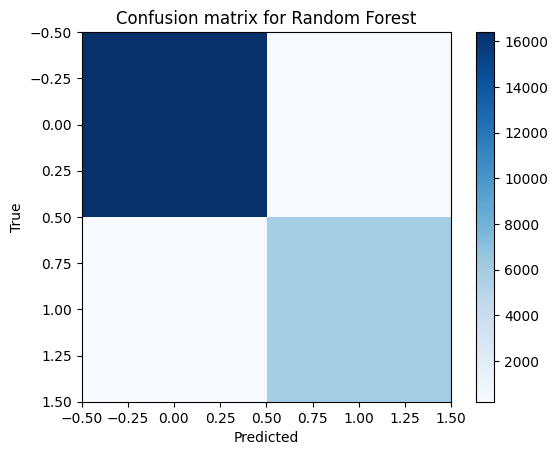

In [64]:
# Predict the target for the test data using grid_search
y_pred_logreg = grid_search_LR.predict(X_test)
y_pred_rf = grid_search.predict(X_test)
# Create the confusion matrix for Logistic Regression
cm_LR = confusion_matrix(y_test, y_pred_logreg, labels=[0, 1])
cm_rf = confusion_matrix(y_test, y_pred_rf,labels=[0,1])

# Plot the confusion matrix for Logistic Regression
plt.imshow(cm_LR, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix for Logistic Regression using GridSearchCV')
plt.show()


plt.imshow(cm_rf, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix for Random Forest')




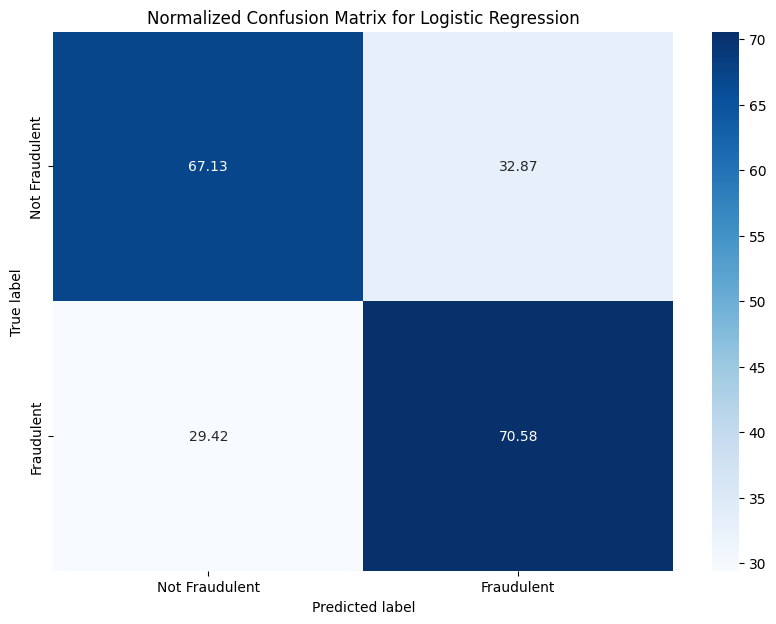

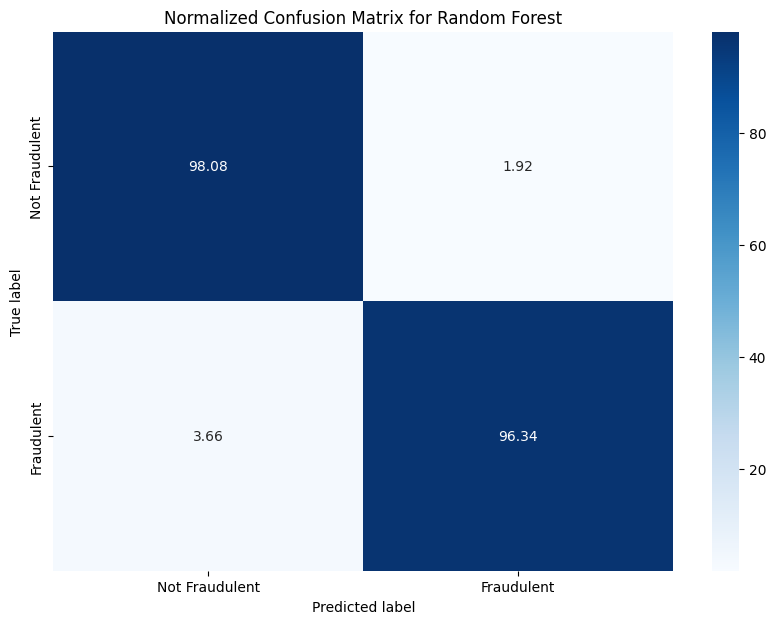

In [73]:

# Compute the confusion matrix for Logistic Regression
cm_LR = confusion_matrix(y_test, y_pred_logreg)

# Normalize the confusion matrix to get percentages
cm_LR_normalized = cm_LR.astype('float') / cm_LR.sum(axis=1)[:, np.newaxis] * 100

# Visualize the normalized confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_LR_normalized, annot=True, cmap='Blues', fmt=".2f", 
            xticklabels=['Not Fraudulent', 'Fraudulent'], 
            yticklabels=['Not Fraudulent', 'Fraudulent'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix for Logistic Regression')
plt.show()


# Compute the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Normalize the confusion matrix to get percentages
cm_rf_normalized = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis] * 100

# Visualize the normalized confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_rf_normalized, annot=True, cmap='Blues', fmt=".2f", 
            xticklabels=['Not Fraudulent', 'Fraudulent'], 
            yticklabels=['Not Fraudulent', 'Fraudulent'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix for Random Forest')
plt.show()




In [72]:

# Calculate the precision, recall, and F1 score for logistic regression
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# Calculate the precision, recall, and F1 score for random forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the precision, recall, and F1 score
print('Precision, recall, and F1 score of logistic regression: ', precision_logreg, recall_logreg, f1_logreg)
print('Precision, recall, and F1 score of random forest: ', precision_rf, recall_rf, f1_rf)


Precision, recall, and F1 score of logistic regression:  0.44109867751780263 0.7058440501383689 0.5429161710386278
Precision, recall, and F1 score of random forest:  0.9485494470267671 0.9633729448152368 0.9559037312227427


In [71]:

# Calculate the classification report for the logistic regression model.
report_lr = classification_report(y_test, y_pred_logreg)

# Calculate the classification report for the random forest model.
report_rf = classification_report(y_test, y_pred_rf)

print('Classification report for logistic regression:')
print(report_lr)

print('Classification report for random forest:')
print(report_rf)


Classification report for logistic regression:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75     16713
           1       0.44      0.71      0.54      6143

    accuracy                           0.68     22856
   macro avg       0.65      0.69      0.65     22856
weighted avg       0.75      0.68      0.70     22856

Classification report for random forest:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     16713
           1       0.95      0.96      0.96      6143

    accuracy                           0.98     22856
   macro avg       0.97      0.97      0.97     22856
weighted avg       0.98      0.98      0.98     22856



## 7. Final recommendation of best model

### a) Discussion of the results from a technical perspective, for example, overfitting discussion, complexity and efficiency


The comparative analysis of the logistic regression and random forest models reveals distinct performance variations:

For the **logistic regression** model:

* Precision of **44%** for the positive class (1) implies that when it predicts an instance as fraud, it's accurate about **44%** of the time.
* Recall of **71%** for the positive class suggests it identifies **71%** of the actual fraud cases.
* The F1 score, which harmonizes precision and recall, is **54%** for the positive class, indicating a moderate balance between its predictive accuracy and coverage.

On the other hand, the **random forest classifier** demonstrates remarkable performance:

* Precision of **95%** for the positive class indicates that its predictions are highly accurate.
* A recall of **96%** for the positive class shows that it captures almost all actual fraud instances.
* An F1 score of **96%** for the positive class underscores an exceptional equilibrium between precision and recall.

The evident superiority of the random forest model can be attributed to its ensemble approach, leveraging multiple decision trees. This allows it to capture intricate patterns in the data more effectively than the logistic regression model, which is linear.

However, while the random forest's metrics are compelling, there might be concerns of overfitting, given the near-perfect scores. Though logistic regression showed lesser accuracy, its linear nature makes it more interpretable, which can be beneficial depending on the application's requirements.

In summary, the random forest classifier is the superior model for this dataset in terms of performance metrics. But the choice between models should also consider factors like interpretability, dataset size, and computational efficiency.




### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective

**Significance of Accuracy**:

The random forest model, with an accuracy of 98%, implies that in a real-world scenario, if the company were to process 10,000 claims, it would likely make correct predictions on 9,800 of those claims. This level of accuracy is paramount in ensuring that genuine claims are processed quickly and fraudulent ones are identified and investigated.

**Cost Implications**:

The logistic regression, despite its lower accuracy, has a 71% recall for fraud cases. From a financial standpoint, this means it can catch 71% of the fraudulent claims. However, its precision is only 44%. This implies that when the logistic model flags a claim as fraudulent, it's only correct 44% of the time. The remaining 56% could be genuine claims that are incorrectly flagged, leading to potential customer dissatisfaction and additional costs in re-evaluating these claims.
In contrast, the random forest has both high precision (95%) and recall (96%) for fraud cases, making it more reliable both in identifying genuine claims and in catching frauds. This balance can lead to substantial cost savings by reducing the amount spent on false investigations and by ensuring fraudulent claims don't get approved.

**Operational Efficiency and Customer Satisfaction**:

High false positives, as seen in the logistic regression model, could lead to delays in processing genuine claims, affecting customer satisfaction. On the other hand, a model like the random forest, with its high precision and recall, ensures that genuine claims are processed quickly, leading to higher customer satisfaction, while also effectively identifying fraudulent claims.

**Technical Trade-offs**:

While the random forest's performance is stellar, it's a more complex model. Its predictions, being based on numerous decision trees, aren't as straightforward to explain to non-technical stakeholders compared to logistic regression. This can be a concern when transparency and interpretability are required, especially in sectors where regulatory oversight is significant.
The near-perfect scores of the random forest might also be an indicator of overfitting. While it performs exceptionally on the current dataset, it's essential to continually validate its performance on new data to ensure its robustness.

**Strategic Decisions**:

Given the results, the business needs to weigh the trade-offs. If the priority is to reduce costs associated with fraudulent claims and improve operational efficiency, the random forest seems like the right choice. However, if the business values interpretability and wants a simpler model, especially in the initial phases of implementing a predictive system, logistic regression could be a starting point.


## 8. Conclusion 

### a) What has been successfully accomplished and what has not been successful?
Accomplished Objectives:

**Create Effective Prediction Models**:
* Successfully developed both Logistic Regression and Random Forest classifiers, achieving a high accuracy rate, especially with the Random Forest model.

**Ensure High Accuracy in Predictions:**
* This objective has been largely achieved, especially with the Random Forest classifier, which boasts an accuracy of 98%. This exceeds the standard expectations for many real-world applications.

**Minimize False Positives and Negatives:**
* The Random Forest model has demonstrated high precision and recall, indicating its efficiency in minimizing both false positives and false negatives. However, the Logistic Regression model might lead to more false positives, given its precision score.

**Achieve a Balanced Error Rate of 5%:**
*  While the Random Forest model has an accuracy of 98%, implying an error rate of 2%, it is crucial to dive deeper into the false positive and false negative rates to ascertain if the balanced error rate is achieved.

**Unsuccessful Aspects:**

**Quantify the Financial Impact of Misclassifications:**
* This particular objective has not been addressed yet. Assessing the financial repercussions of misclassifications is essential to provide a complete picture of the model's impact on the business.


### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again?
Upon reflection of the project, there are various potential enhancements and alternative approaches that could be considered for future iterations:

Exploratory Data Analysis (EDA): Although not explicitly mentioned, conducting a comprehensive EDA is essential. This would involve thoroughly analyzing the data to gain deeper insights, identify patterns and correlations, and potentially detect any outliers or anomalies. EDA would also aid in the selection and engineering of relevant features.

Model Selection and Experimentation: Alongside Logistic Regression and Random Forest, exploring other algorithms such as Gradient Boosting, Support Vector Machines (SVM), or neural networks could be worthwhile. This exploration might yield improved results or provide alternative options that strike a balance between accuracy and complexity.

Hyperparameter Tuning: Depending on the available computational resources, further refinement of the selected models through hyperparameter tuning could enhance their performance.


### c) Provide a wish list of future work that you would like to do


Here's a list of future tasks that could enhance this project:

Dataset Expansion: Obtain additional data or different types of data (such as text data from claim descriptions, geolocation data, or time-series data) to potentially reveal more insights and enhance the model's performance.

Real-Time Fraud Detection: Develop a system for real-time fraud detection that can promptly identify and flag fraudulent claims upon submission. This could greatly reduce processing time and expenses.

Deep Learning Models: Explore the utilization of deep learning models for prediction. Although these models require substantial data and computational resources, they have the potential to improve accuracy, particularly when dealing with complex or unstructured data.